# Stochastic Gradient  Descent implementation

### Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading boston data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Loading the boston data into dataframe
df = pd.DataFrame(boston.data)
df['Price'] = boston.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### SGD Function

In [38]:
def SGD(x,y):
    batch_size = int(len(x)/3)
    w_p = np.ones(x.shape[1]) # Taking random value of w
    w_n = np.zeros(x.shape[1])
    b_p = 0
    b_n = 0
    r=1 #Step size
    while(True):
        b = 0 # Taking b as 0 assuming data to be already centred
        d = pd.DataFrame(x)
        d['Price'] = y
        d = d.sample(n=batch_size)
        x_data = d.iloc[:,:-1].values
        y_target = d.iloc[:,-1].values
        w_n = w_p - r*dydw(x_data,y_target,batch_size,w_p,b)
        if(abs(np.mean(w_n-w_p))<1e-10):
            break
        r=r/2
        w_p = w_n
    r=1
    while(True):
        d = pd.DataFrame(x)
        d['Price'] = y
        d = d.sample(n=batch_size)
        x_data = d.iloc[:,:-1].values
        y_target = d.iloc[:,-1].values
        b_n = b_p - r*dydb(x_data,y_target,batch_size,w_n,b_p)
        if(abs(b_n-b_p)<1e-10):
            break
        r=r/2
        b_p = b_n
    return w_n,b_n

### Function for finding dy/dw at w and dy/db at b

In [5]:
def dydw(x,y,batch_size,w,b):
    s = np.zeros(x.shape[1])
    for i in range(batch_size):
        s += -2*x[i]*(-b-np.matmul(w,x[i])+y[i])
    s/=batch_size
    return s
def dydb(x,y,batch_size,w,b):
    s = 0
    for i in range(batch_size):
        s += -2*(-b-np.matmul(w,x[i])+y[i])
    s=s/batch_size
    return s

### Fitting the train data to the linear regression model to get optimal w and b

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

w,b = SGD(x_train,y_train)

### Function for predicting the target values using the fitted model.

In [7]:
def predict(x):
    v = []
    for i in range(len(x)):
        v.append(np.matmul(w,x[i])+b)
    return np.array(v)

### Testing the SGD model

Text(0.5,1,'Error plot for SGD')

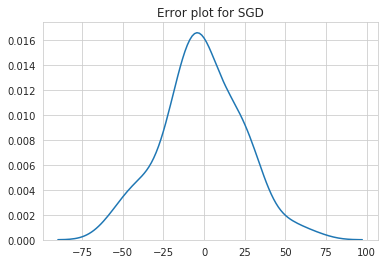

In [40]:
x_test = sc.transform(x_test)
y_pred = predict(x_test)
sns.set_style('whitegrid')
sns.kdeplot((y_pred-y_test))
plt.title("Error plot for SGD")

### Predicting the values using sklearn Linear Regression Library

Text(0.5,1,'Error Plot of sklearn  Linear Regression')

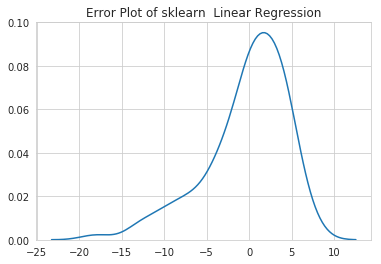

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred_lr = regressor.predict(x_test)
sns.set_style('whitegrid')
sns.kdeplot((y_pred_lr-y_test))
plt.title("Error Plot of sklearn  Linear Regression")

### Comparision of self implemented LR and sklearn's LR

Coef from Linear Regression library:- 
 [-1.1457156   0.92693968  0.10764088  0.42616875 -1.96217693  2.51367895
 -0.07065593 -3.20521916  2.70652708 -2.02558209 -1.91451494  0.90551725
 -3.8248595 ]
Intercept value from Linear Regression library:-  22.54084158415843


Coef value from self implemented LR:- 
 [ -5.89980849   4.56833455  10.90992974  -5.19970738 -10.66868032
  -0.06176998  -7.29436979  -9.09288918  -1.21061266   8.73814514
   2.03565714  -2.78878444   6.5528918 ]
Intercept value from self implemented LR:-  21.38443805856386


Text(0.5,1,'Plot of differences in the prediction')

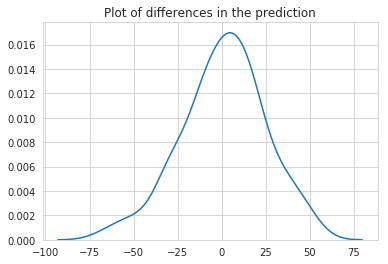

In [42]:
print("Coef from Linear Regression library:- \n",regressor.coef_)
print("Intercept value from Linear Regression library:- ",regressor.intercept_)
print("\n\nCoef value from self implemented LR:- \n",w)
print("Intercept value from self implemented LR:- ",b)
sns.set_style('whitegrid')
sns.kdeplot((y_pred_lr-y_pred))
plt.title("Plot of differences in the prediction")

### From the above plot, we can deduce that the mean of the differences in the prediction of the two models is at zero which means the self implemented Linear Regression is doing well in comparision with the sklearn's Linear Regression.

### =====================================================================================